1)FOR SPELL CHECKER

In [ ]:
import re
import string
from collections import Counter
import numpy as np


In [ ]:
def read_corpus(filename):
  with open(filename, "r") as file:
    lines = file.readlines()
    words = []
    for line in lines:
      words += re.findall(r'\w+', line.lower())

  return words

In [ ]:
#count total number of words in big.txt file
words = read_corpus("./the_girl_kingdom.txt")
print(f"There are {len(words)} total words in the corpus")

There are 7656 total words in the corpus


In [ ]:
#count total number of unique words in text file
vocabs = set(words)
print(f"There are {len(vocabs)} unique words in the vocabulary")

There are 2142 unique words in the vocabulary


In [ ]:
word_counts = Counter(words)
#example of counting occurence of word "love" in the corpus
print(word_counts["love"])

2


In [ ]:
total_word_count = float(sum(word_counts.values()))
#counting word probability
word_probas = {word: word_counts[word] / total_word_count for word in word_counts.keys()}

In [ ]:
print(word_probas["love"])

0.00026123301985370953


In [ ]:
def split(word):
  return [(word[:i], word[i:]) for i in range(len(word) + 1)]

In [ ]:
print(split("kingdom"))

[('', 'kingdom'), ('k', 'ingdom'), ('ki', 'ngdom'), ('kin', 'gdom'), ('king', 'dom'), ('kingd', 'om'), ('kingdo', 'm'), ('kingdom', '')]


In [ ]:
def delete(word):
  return [l + r[1:] for l,r in split(word) if r]

In [ ]:
print(delete("kingdom"))

['ingdom', 'kngdom', 'kigdom', 'kindom', 'kingom', 'kingdm', 'kingdo']


In [ ]:
def swap(word):
  return [l + r[1] + r[0] + r[2:] for l, r in split(word) if len(r)>1]

In [ ]:
print(swap("kingdom"))

['ikngdom', 'knigdom', 'kigndom', 'kindgom', 'kingodm', 'kingdmo']


In [ ]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [ ]:
#replacing first letter by all alphabets 
def replace(word):
  letters = string.ascii_lowercase
  return [l + c + r[1:] for l, r in split(word) if r for c in letters]

In [ ]:
print(replace("kingdom"))

['aingdom', 'bingdom', 'cingdom', 'dingdom', 'eingdom', 'fingdom', 'gingdom', 'hingdom', 'iingdom', 'jingdom', 'kingdom', 'lingdom', 'mingdom', 'ningdom', 'oingdom', 'pingdom', 'qingdom', 'ringdom', 'singdom', 'tingdom', 'uingdom', 'vingdom', 'wingdom', 'xingdom', 'yingdom', 'zingdom', 'kangdom', 'kbngdom', 'kcngdom', 'kdngdom', 'kengdom', 'kfngdom', 'kgngdom', 'khngdom', 'kingdom', 'kjngdom', 'kkngdom', 'klngdom', 'kmngdom', 'knngdom', 'kongdom', 'kpngdom', 'kqngdom', 'krngdom', 'ksngdom', 'ktngdom', 'kungdom', 'kvngdom', 'kwngdom', 'kxngdom', 'kyngdom', 'kzngdom', 'kiagdom', 'kibgdom', 'kicgdom', 'kidgdom', 'kiegdom', 'kifgdom', 'kiggdom', 'kihgdom', 'kiigdom', 'kijgdom', 'kikgdom', 'kilgdom', 'kimgdom', 'kingdom', 'kiogdom', 'kipgdom', 'kiqgdom', 'kirgdom', 'kisgdom', 'kitgdom', 'kiugdom', 'kivgdom', 'kiwgdom', 'kixgdom', 'kiygdom', 'kizgdom', 'kinadom', 'kinbdom', 'kincdom', 'kinddom', 'kinedom', 'kinfdom', 'kingdom', 'kinhdom', 'kinidom', 'kinjdom', 'kinkdom', 'kinldom', 'kinmdom'

In [ ]:
def insert(word):
  letters = string.ascii_lowercase
  return [l + c + r for l, r in split(word) for c in letters]

In [ ]:
print(insert("kingdom"))

['akingdom', 'bkingdom', 'ckingdom', 'dkingdom', 'ekingdom', 'fkingdom', 'gkingdom', 'hkingdom', 'ikingdom', 'jkingdom', 'kkingdom', 'lkingdom', 'mkingdom', 'nkingdom', 'okingdom', 'pkingdom', 'qkingdom', 'rkingdom', 'skingdom', 'tkingdom', 'ukingdom', 'vkingdom', 'wkingdom', 'xkingdom', 'ykingdom', 'zkingdom', 'kaingdom', 'kbingdom', 'kcingdom', 'kdingdom', 'keingdom', 'kfingdom', 'kgingdom', 'khingdom', 'kiingdom', 'kjingdom', 'kkingdom', 'klingdom', 'kmingdom', 'kningdom', 'koingdom', 'kpingdom', 'kqingdom', 'kringdom', 'ksingdom', 'ktingdom', 'kuingdom', 'kvingdom', 'kwingdom', 'kxingdom', 'kyingdom', 'kzingdom', 'kiangdom', 'kibngdom', 'kicngdom', 'kidngdom', 'kiengdom', 'kifngdom', 'kigngdom', 'kihngdom', 'kiingdom', 'kijngdom', 'kikngdom', 'kilngdom', 'kimngdom', 'kinngdom', 'kiongdom', 'kipngdom', 'kiqngdom', 'kirngdom', 'kisngdom', 'kitngdom', 'kiungdom', 'kivngdom', 'kiwngdom', 'kixngdom', 'kiyngdom', 'kizngdom', 'kinagdom', 'kinbgdom', 'kincgdom', 'kindgdom', 'kinegdom', 'ki

In [ ]:
def edit1(word):
  return set(delete(word) + swap(word) + replace(word) + insert(word))

In [ ]:
print(edit1("kingdom"))

{'kingdwm', 'kincgdom', 'kinddom', 'kinfgdom', 'kingydom', 'wkingdom', 'kingdjom', 'kyngdom', 'kirgdom', 'kingjom', 'ikingdom', 'kmingdom', 'ikngdom', 'kwingdom', 'kiogdom', 'kingiom', 'cingdom', 'kingdoym', 'ringdom', 'kingdfom', 'bkingdom', 'kingdkom', 'kingdome', 'kingdbm', 'yingdom', 'kyingdom', 'kengdom', 'kingdoq', 'kingdoi', 'jkingdom', 'kangdom', 'kinqgdom', 'kigngdom', 'kingdopm', 'kingdox', 'kinadom', 'kingnom', 'kingdodm', 'oingdom', 'kinwdom', 'kingdbom', 'kqngdom', 'kibgdom', 'kcngdom', 'kingzom', 'klngdom', 'kingdo', 'kingdoms', 'kingoom', 'kingdoma', 'aingdom', 'kinqdom', 'kinkdom', 'kingidom', 'kingdolm', 'kinydom', 'kingdim', 'kingdoz', 'kijngdom', 'kingdomt', 'kigndom', 'kixgdom', 'kindom', 'kingdym', 'kingyom', 'kkngdom', 'kingdoe', 'kingdos', 'kingdoa', 'kdngdom', 'kingdog', 'kipngdom', 'kingndom', 'kingdfm', 'kingdyom', 'mkingdom', 'kingdomv', 'kingdnom', 'kiygdom', 'kingdovm', 'kingdeom', 'kingdrom', 'kincdom', 'kingdomj', 'kingdmom', 'khngdom', 'kingdxom', 'kingd

In [ ]:
def edit2(word):
  return set(e2 for e1 in edit1(word) for e2 in edit1(e1))

In [ ]:
print(edit2("kingdom"))

{'kingfxom', 'zkingdrm', 'kdngdbm', 'kirguom', 'kangbom', 'kwmingdom', 'kinhodom', 'kwntdom', 'ktegdom', 'kwingdomg', 'jinzgdom', 'khingdrm', 'kaibngdom', 'kfinhgdom', 'kilnguom', 'kjinwdom', 'xkinsgdom', 'kikmdom', 'kingmdol', 'ektngdom', 'kingedohm', 'hkiagdom', 'kngdoom', 'kingudoim', 'kidgdoc', 'kingdxwm', 'kingaldom', 'kbingdbm', 'kignedom', 'kzjngdom', 'kingdqoj', 'kingdomaf', 'kingqovm', 'kinbgdofm', 'tkingdtom', 'kingdowmt', 'kqngmom', 'kiingdoum', 'kixngdiom', 'aingtom', 'skbingdom', 'koindom', 'kingdohd', 'gkirngdom', 'kinvcdom', 'kyinigdom', 'fkingdomu', 'ksnddom', 'kingdofx', 'kingdfoom', 'pkilngdom', 'mkiongdom', 'kiqngdoem', 'kiagdo', 'kikngjom', 'cingdomc', 'jkingdwom', 'rkxingdom', 'bingbdom', 'kinidnm', 'kincgdoml', 'kingdomrq', 'kxnglom', 'kiagdobm', 'kinvgdzom', 'ksingdzom', 'kindgdmom', 'kinvlgdom', 'kingdakom', 'kinngdomn', 'kisgtom', 'yintdom', 'ekingqdom', 'kinsgdo', 'kingfomi', 'mkingdokm', 'lingdomc', 'kingdwfm', 'kinhdomt', 'kxngdomn', 'kinpuom', 'gingdomu', '

In [ ]:
#function to correct application
def correct_spelling(word, vocabulary, word_probabilities):
  if word in vocabulary:
    print(f"{word} is already correctly spelt")
    return 

  suggestions = edit1(word) or edit2(word) or [word]
  best_guesses = [w for w in suggestions if w in vocabulary]
  return [(w, word_probabilities[w]) for w in best_guesses]

In [ ]:
word = "kingom"
corrections = correct_spelling(word, vocabs, word_probas)

if corrections:
  print(corrections)
  probs = np.array([c[1] for c in corrections])
  best_ix = np.argmax(probs)
  correct = corrections[best_ix][0]
  print(f"{correct} is suggested for {word}")

[('kingdom', 0.0007836990595611285)]
kingdom is suggested for kingom


In [ ]:
class SpellChecker(object):

  def __init__(self, corpus_file_path):
    with open(corpus_file_path, "r") as file:
      lines = file.readlines()
      words = []
      for line in lines:
        words += re.findall(r'\w+', line.lower())

    self.vocabs = set(words)
    self.word_counts = Counter(words)
    total_words = float(sum(self.word_counts.values()))
    self.word_probas = {word: self.word_counts[word] / total_words for word in self.vocabs}

  def _level_one_edits(self, word):
    letters = string.ascii_lowercase
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [l + r[1:] for l,r in splits if r]
    swaps = [l + r[1] + r[0] + r[2:] for l, r in splits if len(r)>1]
    replaces = [l + c + r[1:] for l, r in splits if r for c in letters]
    inserts = [l + c + r for l, r in splits for c in letters] 

    return set(deletes + swaps + replaces + inserts)

  def _level_two_edits(self, word):
    return set(e2 for e1 in self._level_one_edits(word) for e2 in self._level_one_edits(e1))

  def check(self, word):
    candidates = self._level_one_edits(word) or self._level_two_edits(word) or [word]
    valid_candidates = [w for w in candidates if w in self.vocabs]
    return sorted([(c, self.word_probas[c]) for c in valid_candidates], key=lambda tup: tup[1], reverse=True)


In [ ]:
checker = SpellChecker("./the_girl_kingdom.txt")

In [ ]:
string1 = (input("enter your spelling: "))

enter your spelling: gurl


In [ ]:
str1=string1.lower()

In [ ]:
print ("The correct possible spelling can be: ")
test=checker.check(str1)
print(test)

The correct possible spelling can be: 
[('girl', 0.0007836990595611285), ('curl', 0.00013061650992685477)]


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('spell_checker.pkl', 'wb')

# dump information to that file
pickle.dump(test, file)

For text generation : ENGLISH TEXT

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
file = open("the_girl_kingdom.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  A long, busy street in San Francisco. Innumerable small shops lined it

The Last Line:  freshness of a dream!"


In [ ]:
#cleaning the text
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'A long, busy street in San Francisco. Innumerable small shops lined it from north to south; horse cars, always crowded with passengers, hurried to and fro; narrow streets intersected the  oader one, these built up with small dwellings, most of them rather neglected by their owners. In the middle distance other narrow streets and alleys where taller houses st'

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'A long  busy street in San Francisco  Innumerable small shops lined it from north to south  horse cars  always crowded with passengers  hurried to and fro  narrow streets intersected the  oader one  these built up with small dwellings  most of them rather neglected by their owners  In the middle distance other narrow streets and alleys where taller houses stood  and the windows  fire escapes  and balconies of these  added great variety to the landscape  as the families housed there kept most of '

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'A long, busy street in San Francisco. Innumerable small shops lined it from north to south; horse cars, always crowded with passengers, hurried and fro; narrow streets intersected the oader one, these built up dwellings, most of them rather neglected by their owners. In middle distance other alleys where taller houses stood, windows, fire escapes, balconies these, added great variety landscape, as families housed there kept effects on outside during long dry season. Still farther away were roofs'

In [ ]:
#tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[4, 135, 136, 25, 14, 426, 50, 427, 428, 137]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2168


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:8]

The Length of sequences are:  2821


array([[  4, 135],
       [135, 136],
       [136,  25],
       [ 25,  14],
       [ 14, 426],
       [426,  50],
       [ 50, 427],
       [427, 428]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [  4 135 136  25  14]
The responses are:  [135 136  25  14 426]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#creating the model
model = Sequential()
model.add(Embedding(vocab_size, 5, input_length=1))
model.add(LSTM(3000, return_sequences=True))
model.add(LSTM(3000))
model.add(Dense(3000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

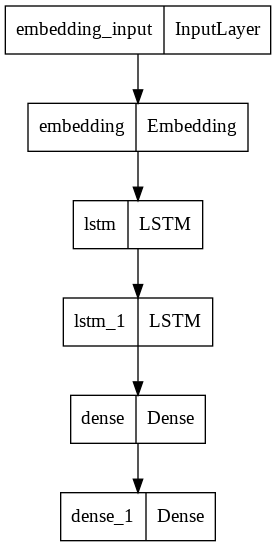

In [ ]:
#plotting the model
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [ ]:
#compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#fit model
model.fit(X, y, epochs=5, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/5
45/45 [==============================] - ETA: 0s - loss: 7.6885
Epoch 00001: loss improved from inf to 7.68853, saving model to nextword1.h5
45/45 [==============================] - 16s 201ms/step - loss: 7.6885 - lr: 0.0010
Epoch 2/5
45/45 [==============================] - ETA: 0s - loss: 7.6786
Epoch 00002: loss improved from 7.68853 to 7.67858, saving model to nextword1.h5
45/45 [==============================] - 10s 233ms/step - loss: 7.6786 - lr: 0.0010
Epoch 3/5
45/45 [==============================] - ETA: 0s - loss: 7.6666
Epoch 00003: loss improved from 7.67858 to 7.66664, saving model to nextword1.h5
45/45 [==============================] - 20s 445ms/step - loss: 7.6666 - lr: 0.0010
Epoch 4/5
45/45 [==============================] - ETA: 0s - loss: 7.6546
Epoch 00004: loss improved from 7.66664 to 7.65456, saving model to nextword1.h5
45/45 [==============================] - 23s 521ms/step - loss: 7.6546 - lr: 0.0010
Epoch 5/5
45/45 [==============================]

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
pip freeze > requirements.txt

In [ ]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask

In [ ]:
from textblob import TextBlob
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('spell_checker.pkl', 'rb'))
# Load the model and tokenizer
model1 = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route('/',methods=['GET'])
def home():
  return render_template('Emain.html')
@app.route('/the_girl_kingdom',methods=['GET'])
def next():
  return render_template('the_girl_kingdom.html')
@app.route('/check', methods=['POST'])
def check():
  if request.method == 'POST':
    phrase = request.form['phrase']
    prediction=Predict_Next_Words(model1, tokenizer, phrase)
  return render_template('the_girl_kingdom.html',output=prediction)
@app.route('/correct', methods=['POST'])
def correct():
    if request.method == 'POST':
        input = request.form['input']
        text = TextBlob(input)
    return render_template('the_girl_kingdom.html', input=text, output1=text.correct())



if __name__ == "__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://21d0-34-77-243-56.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [06/Dec/2021 06:02:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:01] "GET /static/the_girl_kingdom.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:01] "GET /static/twofrogs.png HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:01] "GET /static/boy_wolf.png HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:01] "GET /static/agnigundum.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:01] "GET /static/telgu1.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:01] "GET /static/telgu2.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:01] "GET /static/panchtantra.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:02] "GET /static/hindi1.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:02] "GET /static/hindi2.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:02:03] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Dec/2021 06:02:07] "GET /the_girl_kingdom HTTP/1.1" 200 -


127.0.0.1 - - [06/Dec/2021 06:02:18] "POST /check HTTP/1.1" 200 -


a


127.0.0.1 - - [06/Dec/2021 06:02:54] "POST /correct HTTP/1.1" 200 -
